In [1]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns

sns.set_theme(style="whitegrid")

# import NYT data

In [2]:
import pickle
with open('NYT_all_extended.pkl' , 'rb') as pickle_file:
    NYT_all = pickle.load(pickle_file)

NYT_all    

,Unnamed: 0,headline,month,year,tokenized_nltk,lower_words_nltk,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,...,future_bin,dems_bin,superlatives_n_bin,numbers_bin,w_words_n_bin,numbers_bin_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,Flesch_Reading_Ease
0,0,"A Camera and an Eye, Both One of a Kind",1,2010,"[A, Camera, and, an, Eye, ,, Both, One, of, a,...","[a, camera, and, an, eye, both, one, of, a, kind]",10,39,2.900000,1,...,0,0,0,0,0,0,0,0,0,103.63
1,1,Looking Ahead: Dance,1,2010,"[Looking, Ahead, :, Dance]","[looking, ahead, dance]",3,20,5.666667,1,...,0,0,0,0,0,0,0,0,0,93.81
2,2,Chronicle of a Changing City,1,2010,"[Chronicle, of, a, Changing, City]","[chronicle, of, a, changing, city]",5,28,4.800000,1,...,0,0,0,0,0,0,0,0,0,66.40
3,3,Chick-fil-A Bowl: No. 11 Virginia Tech (9-3) v...,1,2010,"[Chick-fil-A, Bowl, :, No, ., 11, Virginia, Te...","[chick-fil-a, bowl, no, 11, virginia, tech, 9-...",10,64,4.800000,2,...,0,0,0,1,0,1,0,0,0,69.79
4,4,A Taxing Estate,1,2010,"[A, Taxing, Estate]","[a, taxing, estate]",3,15,4.333333,1,...,0,0,0,0,0,0,0,0,0,59.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55488,4149,"‘Ratatouille,’ the Musical: How This TikTok Cr...",12,2020,"[‘, Ratatouille, ,, ’, the, Musical, :, How, T...","[‘, ratatouille, ’, the, musical, how, this, t...",11,66,5.090909,1,...,0,1,0,0,1,0,0,0,0,45.42
55489,4150,Some recipe ideas for a New Year’s Eve at home.,12,2020,"[Some, recipe, ideas, for, a, New, Year, ’, s,...","[some, recipe, ideas, for, a, new, year, ’, s,...",12,47,3.083333,1,...,0,0,0,0,0,0,0,0,0,112.09
55490,4151,Microsoft Says Russian Hackers Viewed Some of ...,12,2020,"[Microsoft, Says, Russian, Hackers, Viewed, So...","[microsoft, says, russian, hackers, viewed, so...",10,61,5.200000,1,...,0,0,0,0,0,0,0,0,0,78.25
55491,4152,New in Paperback: ‘The Red Lotus’ and ‘This Is...,12,2020,"[New, in, Paperback, :, ‘, The, Red, Lotus, ’,...","[new, in, paperback, ‘, the, red, lotus, ’, an...",14,51,2.928571,1,...,0,1,0,0,0,0,0,0,0,86.71


# import upworthy data

In [3]:
with open('upworthy_ling_features_numbered_and_extended.pkl', 'rb') as pickle_file:
    upworthy_ling_features = pickle.load(pickle_file)
upworthy_ling_features

,number,clickability_test_id,headline,eyecatcher_id,CTR,CTR_story_mean,CTR_within,tokenized_nltk,lower_words_nltk,char_n,...,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,numbers_bin,Flesch_Reading_Ease
0,0,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.049148,0.042171,0.006977,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",84,...,0,0,0,1,0,0,0,0,0,81.80
1,1,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.040224,0.042171,-0.001947,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",84,...,0,0,0,1,0,0,0,0,0,81.80
2,2,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.035576,0.042171,-0.006596,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",84,...,0,0,0,1,0,0,0,0,0,81.80
3,150816,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.043738,0.042171,0.001566,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",84,...,0,0,0,1,0,0,0,0,0,81.80
4,3,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,0.025525,0.026187,-0.000662,"[This, Is, What, Sexism, Against, Men, Sounds,...","[this, is, what, sexism, against, men, sounds,...",43,...,0,0,1,0,1,0,0,0,0,105.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22661,150666,546d082afd36176c99000049,"What Sexism Against Men Looks Like, With Your ...",546bc55335992b614b000046,0.017954,0.018455,-0.000501,"[What, Sexism, Against, Men, Looks, Like, ,, W...","[what, sexism, against, men, looks, like, with...",69,...,0,0,0,0,1,0,0,0,0,84.68
22662,150684,546c503abadeb51585000003,"When We Were Young, We Were Taught That Cops W...",546c567f545240b352000009,0.004948,0.008233,-0.003285,"[When, We, Were, Young, ,, We, Were, Taught, T...","[when, we, were, young, we, were, taught, that...",91,...,1,0,1,0,1,0,1,0,0,104.64
22663,150686,546c503abadeb51585000003,An Artist Animates The Ugly Truth We Should Al...,546c567f545240b352000009,0.009219,0.008233,0.000986,"[An, Artist, Animates, The, Ugly, Truth, We, S...","[an, artist, animates, the, ugly, truth, we, s...",99,...,1,0,0,0,0,0,0,0,0,80.28
22664,150687,546c503abadeb51585000003,Ferguson Has Taught Us Many Things. Here's The...,546c567f545240b352000009,0.007845,0.008233,-0.000388,"[Ferguson, Has, Taught, Us, Many, Things, ., H...","[ferguson, has, taught, us, many, things, here...",66,...,1,0,0,1,0,0,0,0,0,82.81


In [4]:
# retrieve the year for each headline

upworthy_df = pd.read_csv('upworthy-archive-exploratory-packages-03.12.2020(1).csv')
 
dates_df = pd.read_csv('upworthy-archive-exploratory-packages-03.12.2020(1).csv', parse_dates=['created_at'])
dates_df['year'] = dates_df.created_at.apply(lambda x: x.year)
dates_df.rename(columns={'Unnamed: 0': 'number'}, inplace=True) #rename the first column as "number" 
dates_df = dates_df[['year', 'number']]

upworthy_ling_features = pd.merge(dates_df, upworthy_ling_features, how = 'inner', on = 'number')
upworthy_ling_features

,year,number,clickability_test_id,headline,eyecatcher_id,CTR,CTR_story_mean,CTR_within,tokenized_nltk,lower_words_nltk,...,first_person_pl_bin,future_bin,dems_bin,superlatives_n_bin,w_words_n_bin,uppercase_n_bin,question_marks_n_bin,exclamation_marks_n_bin,numbers_bin,Flesch_Reading_Ease
0,2014,0,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.049148,0.042171,0.006977,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",...,0,0,0,1,0,0,0,0,0,81.80
1,2014,1,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.040224,0.042171,-0.001947,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",...,0,0,0,1,0,0,0,0,0,81.80
2,2014,2,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,0.035576,0.042171,-0.006596,"[They're, Being, Called, ', Walmart's, Worst, ...","[they're, being, called, walmart's, worst, nig...",...,0,0,0,1,0,0,0,0,0,81.80
3,2014,3,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,0.025525,0.026187,-0.000662,"[This, Is, What, Sexism, Against, Men, Sounds,...","[this, is, what, sexism, against, men, sounds,...",...,0,0,1,0,1,0,0,0,0,105.66
4,2014,4,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546d900426714cd2dd00002e,0.034227,0.026187,0.008040,"[This, Is, What, Sexism, Against, Men, Sounds,...","[this, is, what, sexism, against, men, sounds,...",...,0,0,1,0,1,0,0,0,0,105.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22661,2014,150749,546d373426714cde76000018,5 Reasons You May Need To Plan A Vacation - Ri...,546d398a9ad54eec8d00000f,0.004834,0.004972,-0.000139,"[5, Reasons, You, May, Need, To, Plan, A, Vaca...","[5, reasons, you, may, need, to, plan, a, vaca...",...,0,0,0,0,0,0,0,0,1,77.23
22662,2014,150755,546d373426714cde76000018,The Next Time You Encounter A Small Minded Big...,546d398a9ad54eec8d00000f,0.006170,0.004972,0.001197,"[The, Next, Time, You, Encounter, A, Small, Mi...","[the, next, time, you, encounter, a, small, mi...",...,0,0,0,0,0,0,0,0,0,81.63
22663,2014,150756,546d373426714cde76000018,I've Never Wanted To Buy A Plane Ticket More T...,546d398a9ad54eec8d00000f,0.005864,0.004972,0.000892,"[I've, Never, Wanted, To, Buy, A, Plane, Ticke...","[i've, never, wanted, to, buy, a, plane, ticke...",...,0,0,0,0,1,0,0,0,0,77.57
22664,2015,150813,54b6a21662646300182c0000,3 Ladies Having Too Much Fun At The Epicenter ...,54b6a2df3931650012620000,0.010803,0.007634,0.003168,"[3, Ladies, Having, Too, Much, Fun, At, The, E...","[3, ladies, having, too, much, fun, at, the, e...",...,0,0,0,0,0,0,0,0,1,76.22


In [5]:
bin_features = [col for col in upworthy_ling_features.columns if 'bin' in col]
bin_features

['nouns_n_bin',
 'pronouns_n_bin',
 'verbs_n_bin',
 'adjs_n_bin',
 'advs_n_bin',
 'raps_n_bin',
 'first_person_sg_bin',
 'first_person_pl_bin',
 'future_bin',
 'dems_bin',
 'superlatives_n_bin',
 'w_words_n_bin',
 'uppercase_n_bin',
 'question_marks_n_bin',
 'exclamation_marks_n_bin',
 'numbers_bin']

In [6]:
at first, this looks very odd: the NYT has incredibly long headlines! more than 40 words long sometimes! But as you see below, this is due to weeks summaries, and often a three-part title: this week Y does this, Y discusses her new book and Z died. Notice that these extremely long sentences often makes do without verbs, adjectives or the like. 

SyntaxError: invalid syntax (<ipython-input-6-05b8331c39c6>, line 1)

In [8]:
#only keep numeric data
upworthy_numeric = upworthy_ling_features.select_dtypes(include='number')

#all features that are not binary features will be used to draw boxplots
features = [feature for feature in NYT_all.columns if feature in upworthy_numeric.columns if not 'bin' in feature]

In [9]:
NYT = NYT_all[features].assign(newspaper = 'NYT')
upworthy = upworthy_ling_features[features].assign(newspaper = 'upworthy')
cdf = pd.concat([NYT, upworthy])
cdf

,year,lower_words_nltk_n,char_n,lower_words_nltk_mean_len,sents,nltk_stopwords_n,nltk_stopwords_ratio,raps_n,first_person_sg,first_person_pl,...,adjs_ratio,advs_ratio,superlatives_ratio,w_words_ratio,uppercase_n,question_marks_n,dots_n,exclamation_marks_n,Flesch_Reading_Ease,newspaper
0,2010,10,39,2.900000,1,6,0.600000,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,103.63,NYT
1,2010,3,20,5.666667,1,0,0.000000,0,0,0,...,0.000000,0.333333,0.000000,0.000000,0,0,0,0,93.81,NYT
2,2010,5,28,4.800000,1,2,0.400000,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,66.40,NYT
3,2010,10,64,4.800000,2,1,0.100000,0,0,0,...,0.400000,0.000000,0.000000,0.000000,0,0,2,0,69.79,NYT
4,2010,3,15,4.333333,1,1,0.333333,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,59.97,NYT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22661,2014,11,53,3.727273,1,4,0.363636,1,0,0,...,0.000000,0.181818,0.000000,0.000000,0,0,0,0,77.23,upworthy
22662,2014,15,78,4.200000,1,6,0.400000,1,0,0,...,0.200000,0.000000,0.000000,0.000000,0,0,0,0,81.63,upworthy
22663,2014,19,95,4.052632,1,11,0.578947,0,2,0,...,0.052632,0.052632,0.000000,0.052632,0,0,0,0,77.57,upworthy
22664,2015,12,59,4.000000,1,6,0.500000,0,0,0,...,0.083333,0.083333,0.000000,0.000000,0,0,0,0,76.22,upworthy


<ipython-input-10-b9443af071e2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-10-b9443af071e2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-10-b9443af071e2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-10-b9443af071e2>:3: RuntimeW

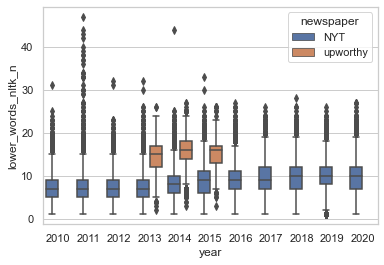

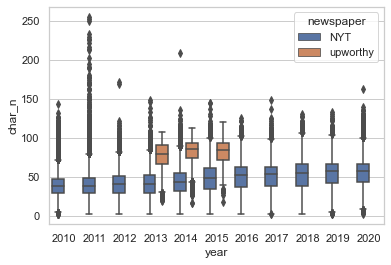

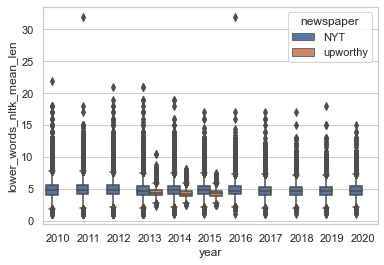

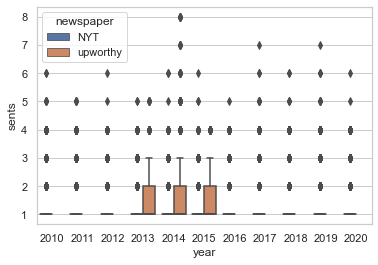

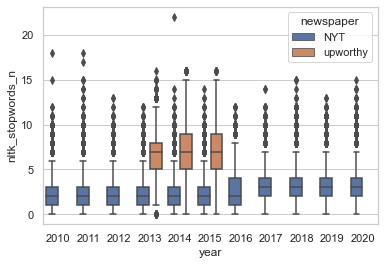

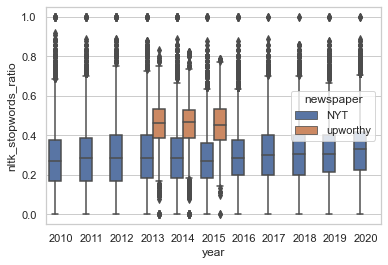

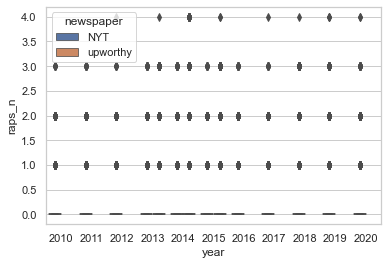

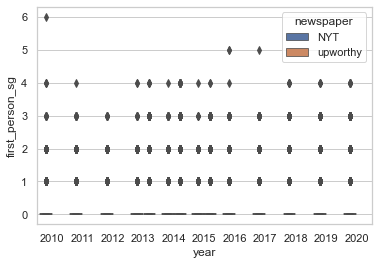

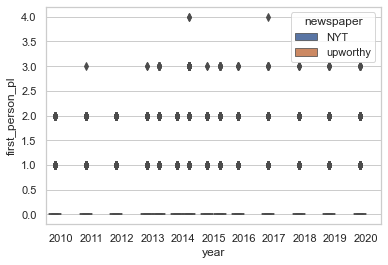

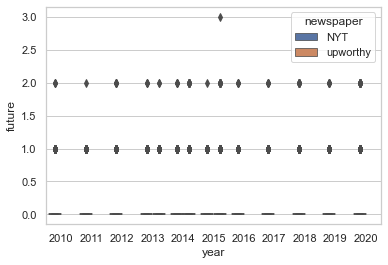

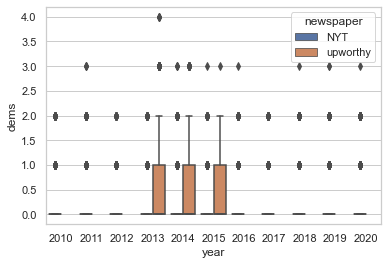

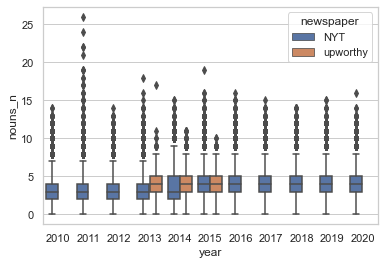

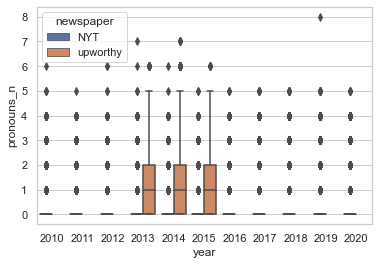

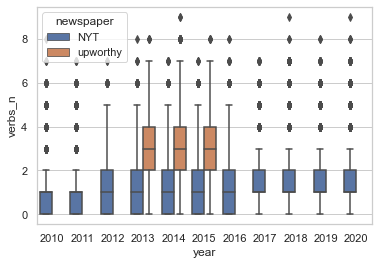

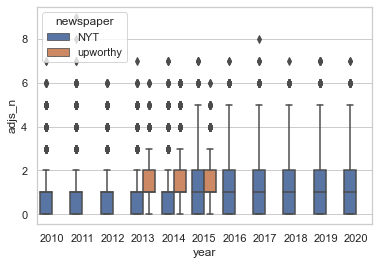

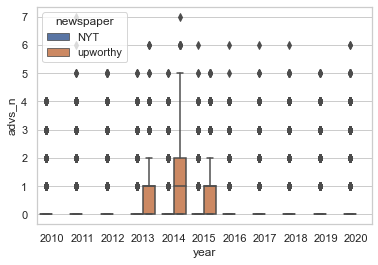

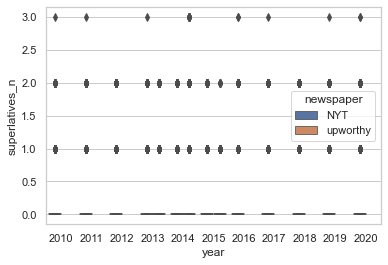

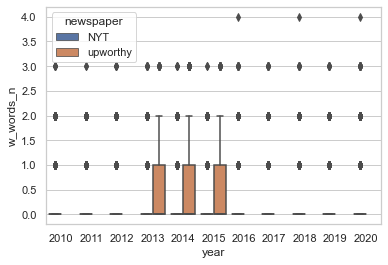

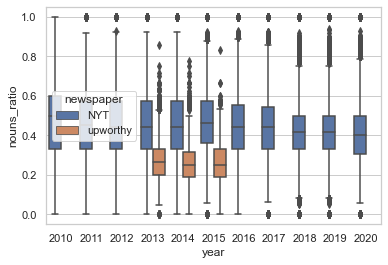

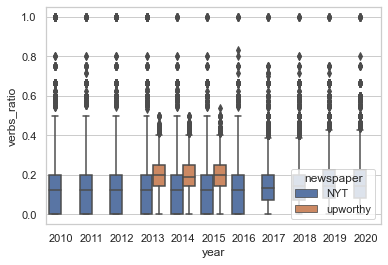

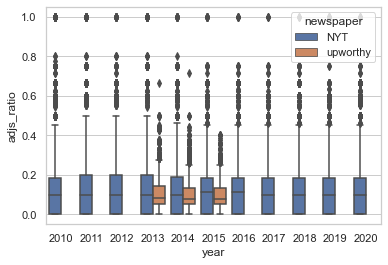

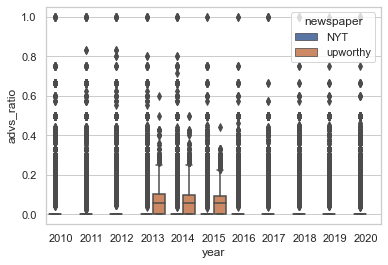

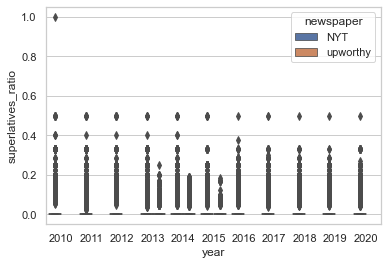

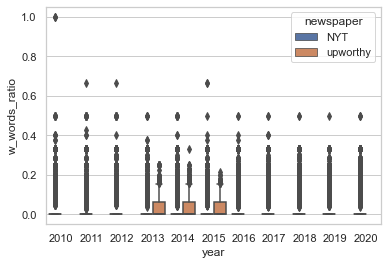

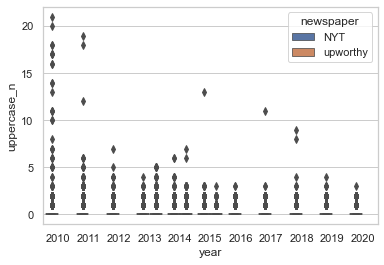

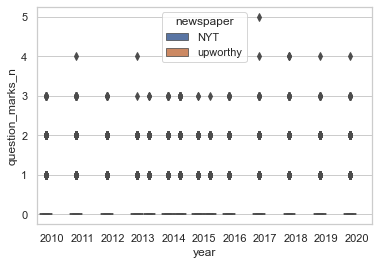

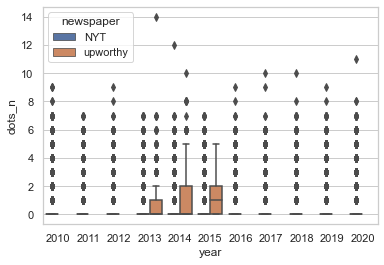

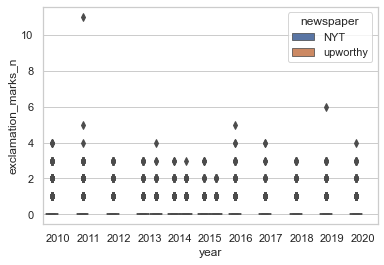

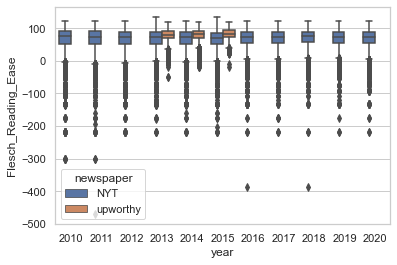

In [10]:
for feature in features:
    if feature != 'year':
        plt.figure()
        ax = sns.boxplot(x="year", y=feature, hue="newspaper", data=cdf)   
    

# inspecting outliers
some NYT headlines are really long! let's take a look at them

In [14]:
pd.options.display.max_colwidth = None
NYT_all[NYT_all['lower_words_nltk_n'] > 30][['headline', 'year', 'lower_words_nltk_n']]

,headline,year,lower_words_nltk_n
94745,Daniel Joseph Martinez: ‘The Enemy of My Enemy Is My Friend and My Friend Is My Enemy. Did You Know It Snows in Los Angeles in the Summer Time’,2010,31
62447,"Jay-Z and Kanye West’s “Watch the Throne”; Honus Honus on his new project, Mister Heavenly; new albums by Gucci Mane with Waka Flocka Flame, John Hiatt and the Wood Brothers.",2011,34
67773,This week: One-man pop obsessive Dev Hynes on his new project Blood Orange and new album “Coastal Grooves”; Nick Brown of the young Tennessee rock band Mona; CDs by Miguel Zenón and Red Hot Chili Peppers. Ben Ratliff is the host.,2011,43
67891,"The spat over President Obama’s upcoming jobs speech, predictions about what the President will say and an assessment of the state of the Republican presidential field. Michael Shear of the Times’s Caucus blog is the host.",2011,40
72520,This week: Jeff Sommer and Gretchen Morgenson on the European crisis and the United States; David Gillen and Graham Bowley on would-be Guggenheims; Robert Frank on “The Darwin Economy”; and Natasha Singer on online ID privacy.,2011,38
74626,Alan Light and Ben Ratliff open up the “Lost Notebooks of Hank Williams”; and The Times’s music critics look ahead to some of this fall’s most notable releases and tours.,2011,36
74700,"Jeff Sommer and Floyd Norris on Operation Twist and the markets, David Gillen and Liz Alderman on Christine Lagarde and the I.M.F., David Barboza on the Chinese economy, and Christina Romer on the Obama jobs plan.",2011,38
76295,"Jon Pareles on “Metals,” the new album by Feist; a conversation with and performance by the rising French Moroccan singer Hindi Zahra; and reviews of new albums by Mindless Behavior, LeAnn Rimes, Bill Frisell and John Scofield. Ben Ratliff is the host.",2011,44
76646,"John Lithgow discusses his new memoir, “An Actor’s Education”; Joe Nocera reviews Ron Suskind’s “Confidence Men”; Julie Bosman has notes from the field; and Jennifer Schuessler has best-seller news. Sam Tanenhaus is the host.",2011,42
76769,"Jeff Sommer with Floyd Norris on the troubles in Europe and the world economy, David Gillen and Bill Vlasic on the 2008 auto crisis, and Tyler Cowen on the logic for tax increases.",2011,33


In [15]:
NYT_all[NYT_all['sents'] > 5][['headline', 'year', 'sents']]

,headline,year,sents
7434,N.H.L. Scoreboard: Flyers-Penguins . . . Again?!,2010,6
111696,Plowed? Yes. Salted? Sure. Cleared? That’s Murky.,2010,6
96039,Helmet? Check. Shoulder Pads? Check. Cup? No Thanks.,2012,6
7364,Skyline? Yes. Night Life? Great! Lake to Skate On? No.,2014,6
38185,Degree? Check. Enthusiasm? Check. Job? Not So Fast.,2014,6
41554,Swearing. Smashing. Fines. Boos. Hugs. Richard Gasquet-Nick Kyrgios Match Has It All.,2015,6
27861,Your Rabbi? Probably a Democrat. Your Baptist Pastor? Probably a Republican. Your Priest? Who Knows.,2017,6
39583,Cobblestones? Check. Castles? Check. Budget? Check. Why Romania Is Worth the Trip.,2017,7
41828,Bag? Check. Racket? Check. Dog? Of Course.,2017,6
9290,N.R.A. Logo? No. #MeToo Shirt? Maybe. Justices Weigh Political Apparel at Polls.,2018,6


In [16]:
upworthy_ling_features[upworthy_ling_features['sents'] > 5][['headline', 'year', 'sents']]

,headline,year,sents
123,"Poverty? Yes. Kids Running Amok? Yes. Healthy, Fresh Vegetables? Actually, Yes.",2014,6
139,"1. China, 2. Iran, 3. Iraq 4. Saudi Arabia, 5. North Korea, 6. USA?!?",2014,8
140,"1. China, 2. Iran, 3. Iraq 4. Saudi Arabia, 5. North Korea, 6. USA?!?",2014,8
141,"1. China, 2. Iran, 3. Iraq 4. Saudi Arabia, 5. North Korea, 6. USA?!?",2014,8
142,"1. China, 2. Iran, 3. Iraq 4. Saudi Arabia, 5. North Korea, 6. USA?!?",2014,8
4084,White Folks In Blackface? Bad. White Rappers? Bring 'Em On. White People With Dreadlocks? Well...,2014,6
5452,Gay? Check. Female? Check. Minority? Check. Meet A Woman Who Beat All The Hollywood Odds.,2014,7
5453,Gay? Check. Female? Check. Minority? Check. Meet A Woman Who Beat All The Hollywood Odds.,2014,7
13441,Gay? Check. Female? Check. Minority? Check. Meet A Woman Who Beat All The Hollywood Odds.,2014,7
13475,He's Angry. He's Loud. He's Ranting. And So What? SO. WHAT?,2014,6


# binary features

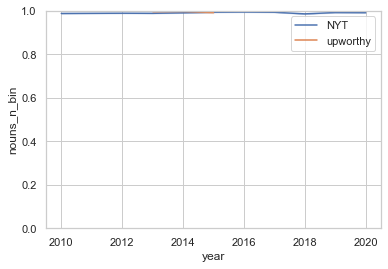

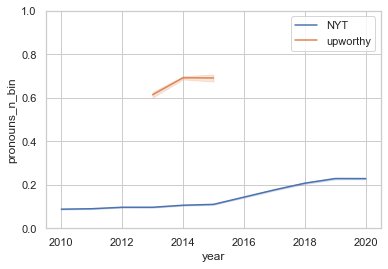

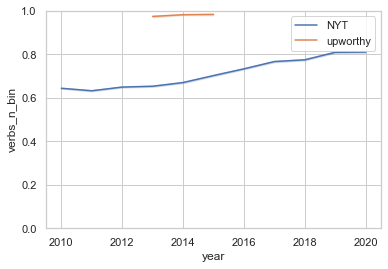

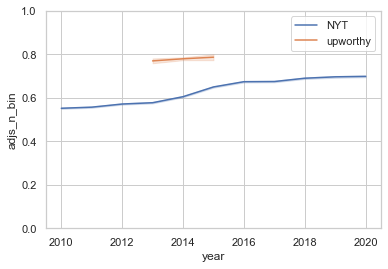

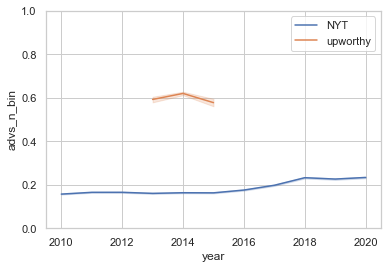

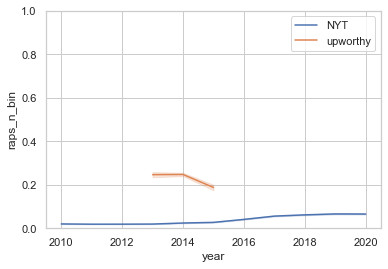

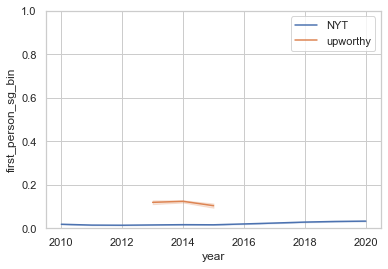

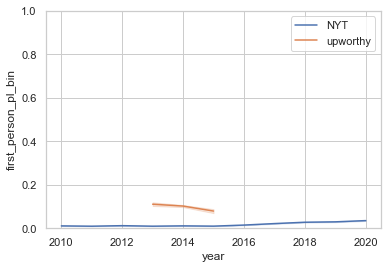

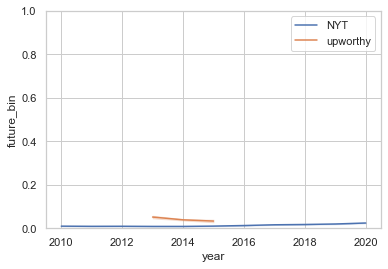

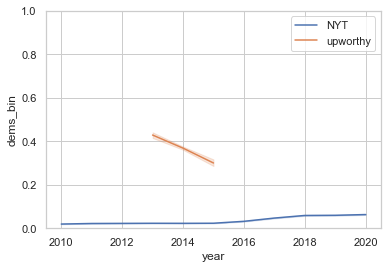

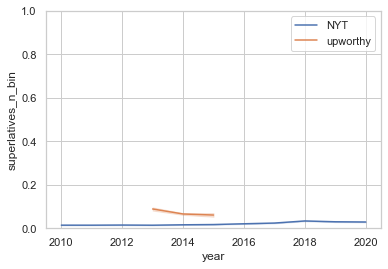

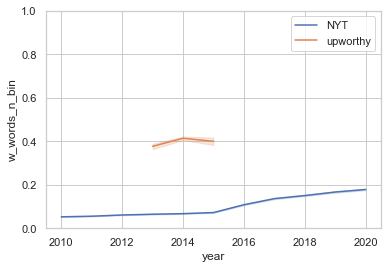

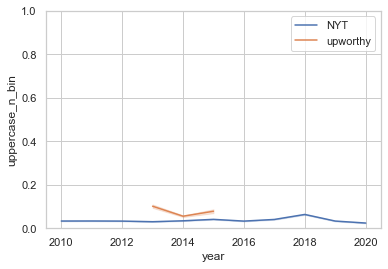

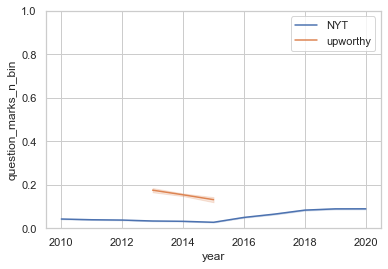

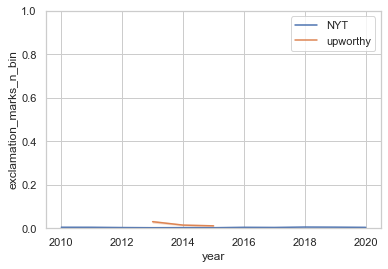

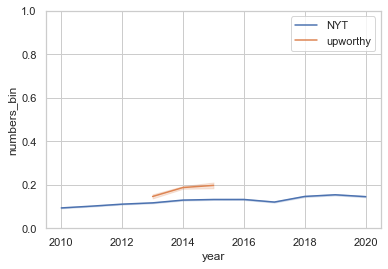

In [18]:
for feature in bin_features:
    plt.figure()
    plt.ylim(0, 1)
    sns.lineplot(x="year", y= feature, data=NYT_all, label='NYT')
    sns.lineplot(x="year", y= feature, data=upworthy_ling_features, label='upworthy')

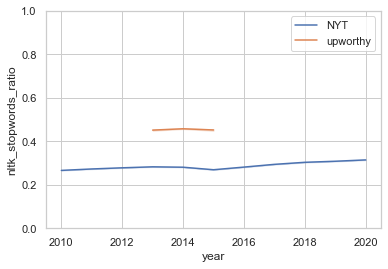

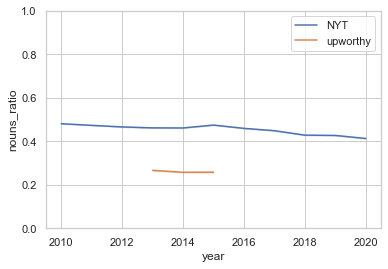

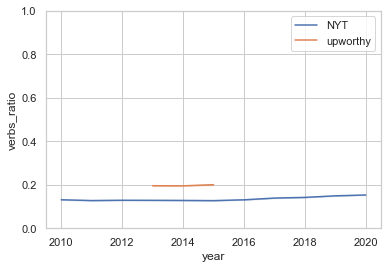

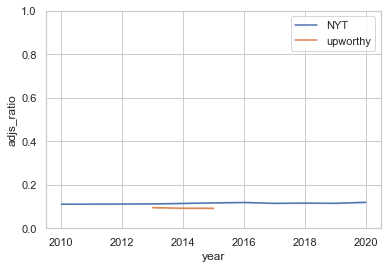

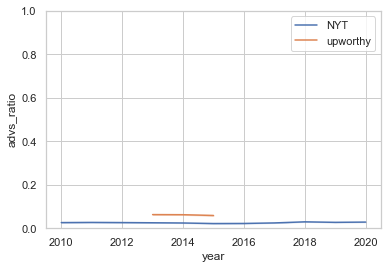

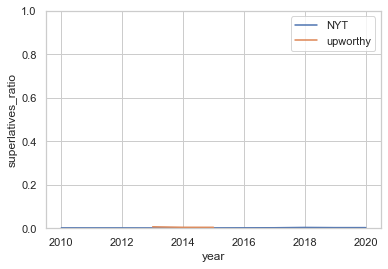

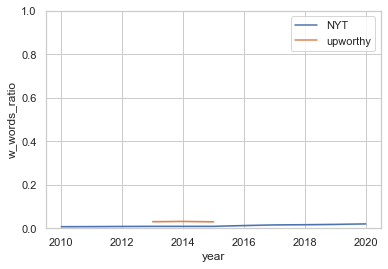

In [19]:
ratios = [col for col in upworthy_ling_features.columns if 'ratio' in col]
ratios

for col in ratios:
    plt.figure()
    plt.ylim(0, 1)
    sns.lineplot(x="year", y= col, data=NYT_all, label='NYT')
    sns.lineplot(x="year", y= col, data=upworthy_ling_features, label='upworthy')

# Mann-Whitney-U-test (expcept for binary features)

In [20]:
#only keep numeric data
upworthy_numeric = upworthy_ling_features.select_dtypes(include='number')
upworthy_numeric.columns

from scipy.stats import mannwhitneyu

features = [feature for feature in NYT_all.columns if feature in upworthy_numeric.columns]

for feature in features: 
    # two samples
    upworthy = upworthy_ling_features[feature]
    NYT = NYT_all[feature]

    # compare samples
    stat, p = mannwhitneyu(upworthy, NYT, alternative = 'two-sided')

    # calculate the common language effect size or probability of superiority as the U statistic divided by the product of the two sample sizes
    CLES = stat / (len(upworthy) * len(NYT))
    
    print(feature, '\n')

    print('Statistics=%.3f, p=%.3f, CLES=%.3f' % (stat, p, CLES))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
        
    print(3 * '\n')

year 

Statistics=9962555441.500, p=0.004, CLES=0.506
Different distribution (reject H0)




lower_words_nltk_n 

Statistics=18392221059.000, p=0.000, CLES=0.933
Different distribution (reject H0)




char_n 

Statistics=18483627544.000, p=0.000, CLES=0.938
Different distribution (reject H0)




lower_words_nltk_mean_len 

Statistics=7088174028.500, p=0.000, CLES=0.360
Different distribution (reject H0)




sents 

Statistics=13057855868.000, p=0.000, CLES=0.663
Different distribution (reject H0)




nltk_stopwords_n 

Statistics=18418238873.500, p=0.000, CLES=0.935
Different distribution (reject H0)




nltk_stopwords_ratio 

Statistics=16135660495.000, p=0.000, CLES=0.819
Different distribution (reject H0)




raps_n 

Statistics=11890535675.000, p=0.000, CLES=0.603
Different distribution (reject H0)




first_person_sg 

Statistics=10844212984.500, p=0.000, CLES=0.550
Different distribution (reject H0)




first_person_pl 

Statistics=10694930244.000, p=0.000, CLES=0.543
Different d

# chi-square test for binary features

In [21]:
NYT = NYT_all[bin_features].assign(newspaper = 'NYT')
upworthy = upworthy_ling_features[bin_features].assign(newspaper = 'upworthy')
cdf = pd.concat([NYT, upworthy])

In [22]:
import researchpy

for bin_feature in bin_features:
    crosstab, res = researchpy.crosstab(cdf[bin_feature], cdf['newspaper'], test= "chi-square")
    display(crosstab)
    display(res.T)


newspaper                 
newspaper         NYT upworthy     All
nouns_n_bin                           
0                8305       83    8388
1              861034    22583  883617
All            869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,82.3077,0.0,0.0096


newspaper                 
newspaper            NYT upworthy     All
pronouns_n_bin                           
0                 756138     7406  763544
1                 113201    15260  128461
All               869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,52843.2747,0.0,0.2434


newspaper                 
newspaper         NYT upworthy     All
verbs_n_bin                           
0              262930      440  263370
1              606409    22226  628635
All            869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,8504.5112,0.0,0.0976


newspaper                 
newspaper        NYT upworthy     All
adjs_n_bin                           
0             332324     5025  337349
1             537015    17641  554656
All           869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,2422.0357,0.0,0.0521


newspaper                 
newspaper        NYT upworthy     All
advs_n_bin                           
0             713511     8898  722409
1             155828    13768  169596
All           869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,26301.8901,0.0,0.1717


newspaper                 
newspaper        NYT upworthy     All
raps_n_bin                           
0             840156    17256  857412
1              29183     5410   34593
All           869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,24931.3309,0.0,0.1672


newspaper                 
newspaper                 NYT upworthy     All
first_person_sg_bin                           
0                      852135    19945  872080
1                       17204     2721   19925
All                    869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,10167.4931,0.0,0.1068


newspaper                 
newspaper                 NYT upworthy     All
first_person_pl_bin                           
0                      855720    20377  876097
1                       13619     2289   15908
All                    869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,9180.9805,0.0,0.1015


newspaper                 
newspaper        NYT upworthy     All
future_bin                           
0             858722    21731  880453
1              10617      935   11552
All           869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,1457.1891,0.0,0.0404


newspaper                 
newspaper       NYT upworthy     All
dems_bin                            
0            841433    14205  855638
1             27906     8461   36367
All          869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,65754.6908,0.0,0.2715


newspaper                 
newspaper                NYT upworthy     All
superlatives_n_bin                           
0                     852597    21064  873661
1                      16742     1602   18344
All                   869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,2899.7632,0.0,0.057


newspaper                 
newspaper           NYT upworthy     All
w_words_n_bin                           
0                790666    13530  804196
1                 78673     9136   87809
All              869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,24318.3349,0.0,0.1651


newspaper                 
newspaper             NYT upworthy     All
uppercase_n_bin                           
0                  838174    21080  859254
1                   31165     1586   32751
All                869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,727.2674,0.0,0.0286


newspaper                 
newspaper                  NYT upworthy     All
question_marks_n_bin                           
0                       826601    19130  845731
1                        42738     3536   46274
All                     869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,5126.9018,0.0,0.0758


newspaper                 
newspaper                     NYT upworthy     All
exclamation_marks_n_bin                           
0                          865833    22257  888090
1                            3506      409    3915
All                        869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,992.4856,0.0,0.0334


newspaper                 
newspaper         NYT upworthy     All
numbers_bin                           
0              763436    18609  782045
1              105903     4057  109960
All            869339    22666  892005

,0,1,2
Chi-square test,Pearson Chi-square ( 1.0) =,p-value =,Cramer's phi =
results,668.0479,0.0,0.0274
